In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from random import randint
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
X = load_boston().data
Y = load_boston().target

In [4]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [23]:
clf = SGDRegressor(learning_rate = 'constant', alpha = 0, eta0 = 0.001, penalty = 'none')
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

26.687997067008606


In [137]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3)

In [8]:
def squared_loss(w, b, x, y):
    error = 0
    for idx, pt in enumerate(x):
        error += (y[idx] - (np.dot(x[idx], w) + b)) ** 2
    return error/len(x)

In [130]:
def stochastic_gradient_descent(learning_rate, w_i, b_i, x_train, y_train, x_test, y_test):
    n_iters = 1000
    partial_w = partial_b = 0
    error_train = []
    error_test = []
#     for i in tqdm(range(n_iters)):
    for i in range(n_iters):
        n_samples = randint(1, x_train.shape[0])
#         print(n_samples)
#         np.random.shuffle(x_train)
#         np.random.shuffle(y_train)
        x_t = x_train[:n_samples]
        y_t = y_train[:n_samples]
#         print(x_t.shape, y_t.shape)
#         print(x_t[0])
#         print(x_t[0], type(x_t[0]))
        for idx, x_i in enumerate(x_t):
#             print(x_i, type(x_i))
#             print(idx)
            partial_w += (-2) * np.dot(x_i.T, (y_t[idx] - (np.dot(w_i, x_i) + b_i)))
            partial_b += (-2) * (y_t[idx] - (np.dot(w_i, x_i) + b_i))
        w_new = w_i - (learning_rate * partial_w)
        b_new = b_i - (learning_rate * partial_b)
        learning_rate = learning_rate/2
#         print(w_new)
#         print(b_new)
        error_train.append(squared_loss(w_new, b_new, x_t, y_t))
        error_test.append(squared_loss(w_new, b_new, x_test, y_test))
        if (w_new==w_i).all() and b_new==b_i:
            print("break", i)
            break
        w_i = w_new
        b_i = b_new
#     print(w_i)
#     print(b_i)
    return w_i, b_i, error_train, error_test

In [76]:
len(err_test)

66

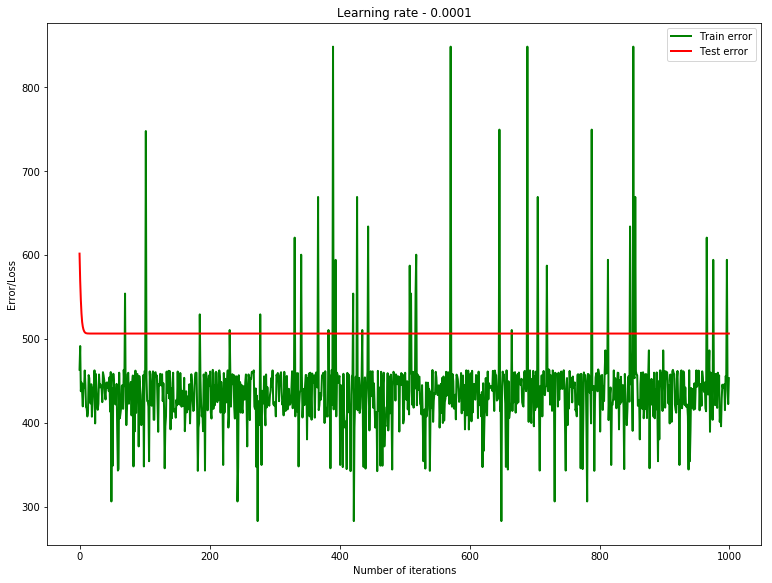

In [40]:
learning_rate = 0.0001
argmin_w, argmin_b, err_train, err_test = stochastic_gradient_descent(
    learning_rate, np.random.rand(13), np.random.rand(), train_x, train_y, test_x, test_y
)

# plot
plt.figure(figsize=(12.8, 9.6))
plt.plot(range(len(err_train)), err_train, color='green', lw=2, label='Train error')
plt.plot(range(len(err_test)), err_test, color='red', lw=2, label='Test error')
plt.xlabel('Number of iterations')
plt.ylabel('Error/Loss')
plt.legend(loc="upper right")
plt.title("Learning rate - " + str(learning_rate))
plt.show()

break 61


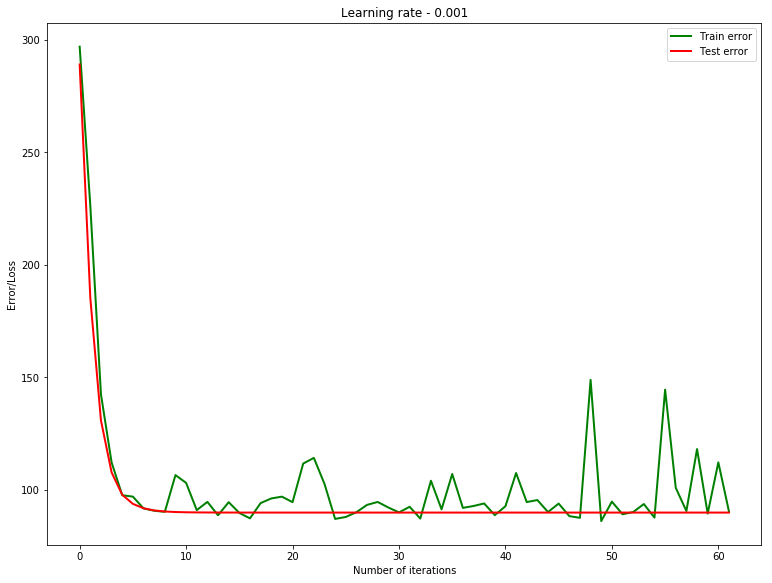

In [139]:
learning_rate = 0.001
argmin_w, argmin_b, err_train, err_test = stochastic_gradient_descent(
    learning_rate, np.random.rand(13).T, np.random.rand(), train_x, train_y, test_x, test_y
)

# plot
plt.figure(figsize=(12.8, 9.6))
plt.plot(range(len(err_train)), err_train, color='green', lw=2, label='Train error')
plt.plot(range(len(err_test)), err_test, color='red', lw=2, label='Test error')
plt.xlabel('Number of iterations')
plt.ylabel('Error/Loss')
plt.legend(loc="upper right")
plt.title("Learning rate - " + str(learning_rate))
plt.show()

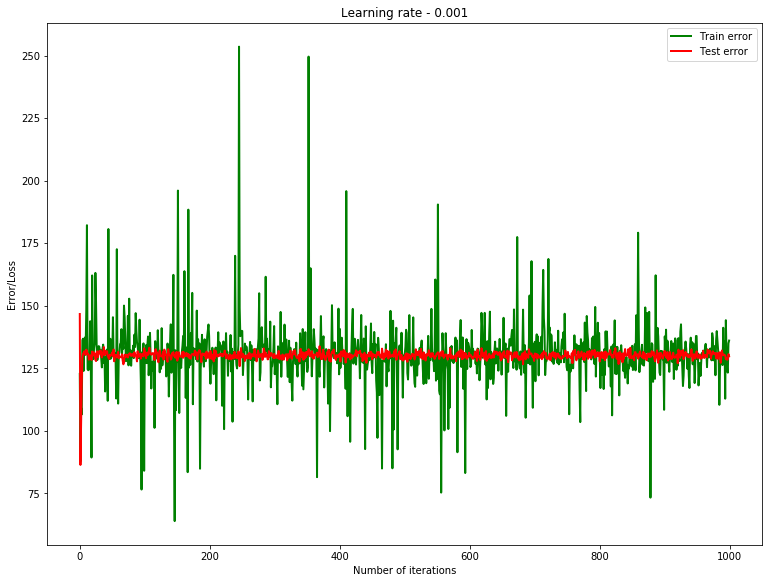

In [113]:
learning_rate = 0.001
argmin_w, argmin_b, err_train, err_test = stochastic_gradient_descent(
    learning_rate, np.random.rand(13).T, np.random.rand(), X, Y, X, Y
)

# plot
plt.figure(figsize=(12.8, 9.6))
plt.plot(range(len(err_train)), err_train, color='green', lw=2, label='Train error')
plt.plot(range(len(err_test)), err_test, color='red', lw=2, label='Test error')
plt.xlabel('Number of iterations')
plt.ylabel('Error/Loss')
plt.legend(loc="upper right")
plt.title("Learning rate - " + str(learning_rate))
plt.show()

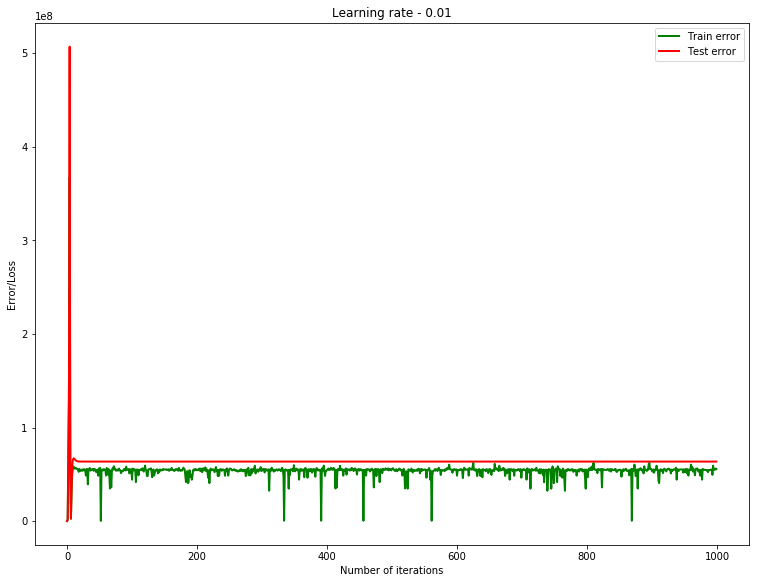

In [44]:
learning_rate = 0.01
argmin_w, argmin_b, err_train, err_test = stochastic_gradient_descent(
    learning_rate, np.random.rand(13).T, np.random.rand(), train_x, train_y, test_x, test_y
)

# plot
plt.figure(figsize=(12.8, 9.6))
plt.plot(range(len(err_train)), err_train, color='green', lw=2, label='Train error')
plt.plot(range(len(err_test)), err_test, color='red', lw=2, label='Test error')
plt.xlabel('Number of iterations')
plt.ylabel('Error/Loss')
plt.legend(loc="upper right")
plt.title("Learning rate - " + str(learning_rate))
plt.show()

In [42]:
# calculating error after finding best w and b with 0.0001 learning rate
err = squared_loss(argmin_w, argmin_b, X, Y)
print("Mean squared error for implemented SGD:", err)

Mean squared error for implemented SGD: 469.288205265448


In [140]:
# calculating error after finding best w and b with 0.001 learning rate
err = squared_loss(argmin_w, argmin_b, X, Y)
print("Mean squared error for implemented SGD:", err)

Mean squared error for implemented SGD: 93.6768227477136


In [45]:
# calculating error after finding best w and b with 0.01 learning rate
err = squared_loss(argmin_w, argmin_b, X, Y)
print("Mean squared error for implemented SGD:", err)

Mean squared error for implemented SGD: 58871003.66219769


In [141]:
print("learning rate:", learning_rate)
print("Best w and b for implemented SGD")
print(argmin_w, argmin_b)
print("Best w and b for sklearn SGD")
print(clf.coef_, clf.intercept_ )

learning rate: 0.001
Best w and b for implemented SGD
[ 0.78793059  1.71643628  1.58366514 -1.70079834  0.60581141  0.56110133
 -0.24740393  1.3849478  -0.33109333  0.10267608 -0.66761031 -0.50971643
 -0.0531183 ] 20.59737908979327
Best w and b for sklearn SGD
[-0.57652218  0.48580458 -0.42994457  0.8588076  -0.63299401  3.188955
 -0.13712565 -1.48986822  0.49167558 -0.41509075 -1.75892721  0.79774432
 -3.0970321 ] [20.75629889]
